# Exercise 2
### Computer Vision, Fall 2025
#### Name: <font color='blue'>Matias Paloranta</font>
---
**Instructions:**
- Return the answer in PDF and Jupyter Notebook formats.

- Return latest on<font color='red'> Sunday 21.9 at 23.50</font> via Moodle.


## Ex 2.1 Edge detection and image filtering (3 points)

<img src="images/convolve.gif" width="500" align="center">

#### (a) Implement convolution function
   - Implement convolution function to filter images with the user-defined kernel.
   - Expect kernel sizes to be 3x3, 5x5, 7x7 or 9x9.
   - In this exercise, we use only 1-channel grayscale images.
   - Convolution function will be used in exercises 2.1b and 2.1c.
  

In [1]:
# Import Python packages needed in exercise 2.1
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
def convolution(img, kernel):
    """
    Args: 
       img: 1-channel grayscale image
       kernel: kernel to use in convolution.
    
    Returns: 
        Convolved image
    """
    # below we will implement valid convolution only since it wasn't specified in the
    # exercise if padding was required

    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    # for image of height/width x and kernel of height/width y
    # the kernel fits inside the image dimensions x - y + 1 times
    # this way we get the dimensions of the convolved (output) image
    output_h = img_h - kernel_h + 1
    output_w = img_w - kernel_w + 1

    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            # select the region in the image covered by the kernel
            image_region = img[i: i + kernel_h, j: j + kernel_w]
            output[i, j] = np.sum(np.multiply(image_region, kernel))

    return output

#### (b) Implement create_box_filter function and filter image

- Implement function to create different size box filters
- Read image "images/norway.jpeg" and convert it to grayscale
- Use your convolution function to filter the image with box filters
- Try different box filter sizes. How does the box size affect the result?

In [3]:
def create_box_filter(size):
    """
    Args: 
        size: Integer that defines size of the box filter.
    
    Returns: 
        box filter with shape size x size.
    """
    box_filter = np.ones((size, size))
    box_filter = box_filter/np.sum(box_filter)
    return box_filter

In [ ]:
def show_image(img, title):
    """For less verbose plotting."""
    
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


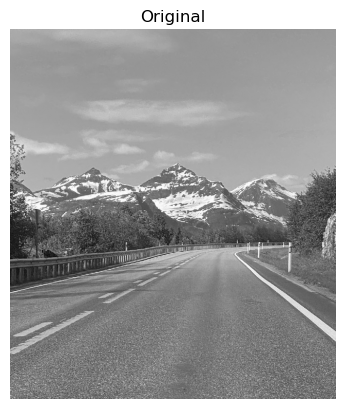

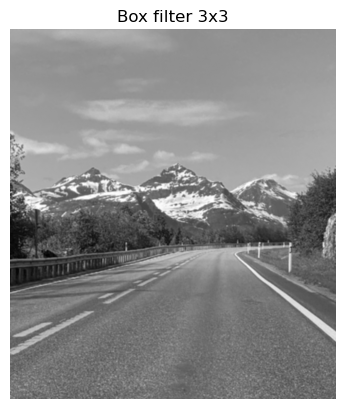

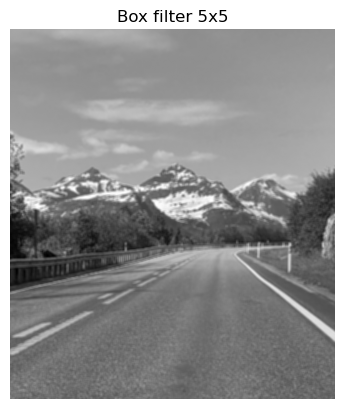

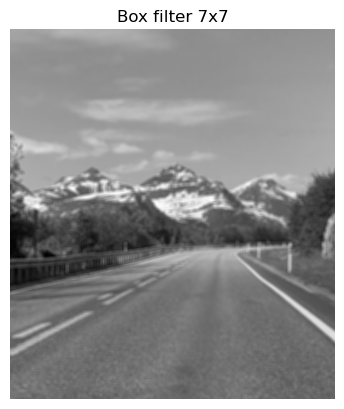

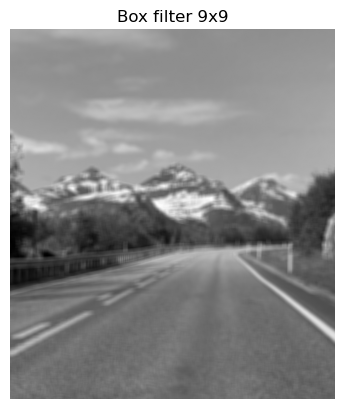

In [24]:
img = cv2.imread("images/norway.jpg", cv2.IMREAD_GRAYSCALE)

filters = [create_box_filter(i) for i in [3, 5, 7, 9]]
filtered = [convolution(img, box_filter) for box_filter in filters]
imgs = [img] + filtered
titles = ["Original"] + [f"Box filter {size}" for size in "3x3 5x5 7x7 9x9".split()]

for img, title in zip(imgs, titles):
    show_image(img, title)

The filtered image appears more blurred as the size of the box filter is increased.

#### (c) Implement create_gaussian_filter function and filter image

- Implement function to create a gaussian filters
- Read image images/norway.jpeg and convert it to grayscale
- Use your convolution function to filter the image with the different gaussian filters
- How does the change of sigma value and kernel size affect the results? Try with different values.


In [6]:
def create_gaussian_filter(size, sigma):
    """
    Args: 
        size: Integer that defines size of the gaussian filter.
        sigma: Standard deviation of Gaussian distribution
    
    Returns: 
        gaussian filter with shape size x size and user defined sigma
    """

    gaussian_filter = np.zeros((size, size))
    # we want to center the filter around 0 such that e.g. index array [0 1 2 3 4] -> [-2 -1 0 1 2]
    c = size // 2
    for idx, _ in np.ndenumerate(gaussian_filter):
        d = (idx[0] - c)**2 + (idx[1] - c)**2
        gaussian_filter[idx] = np.exp(-d / (2 * sigma**2))
        
    # normalize such that the filter sums to 1
    gaussian_filter = gaussian_filter/np.sum(gaussian_filter)
    return gaussian_filter

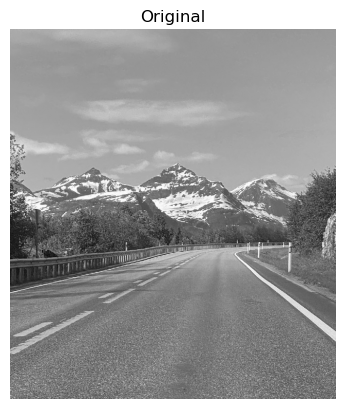

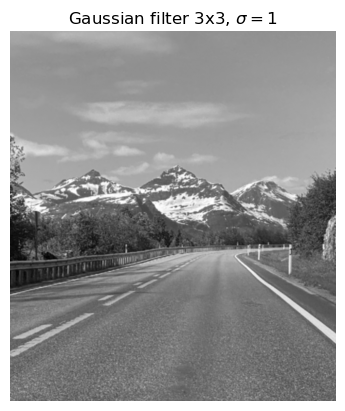

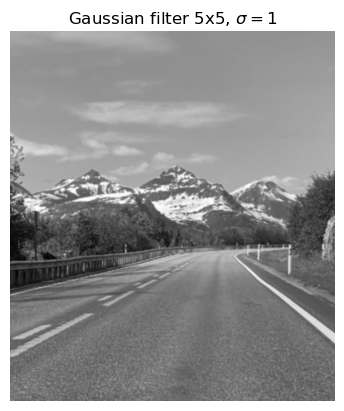

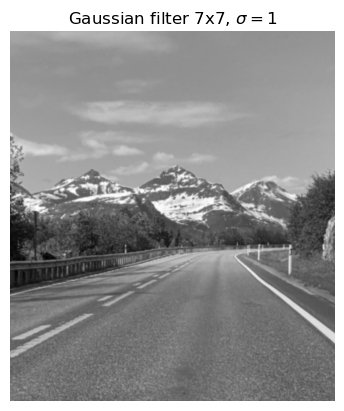

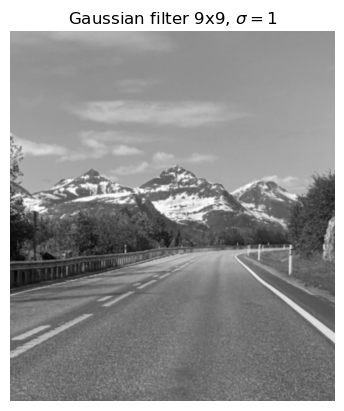

In [27]:
img = cv2.imread("images/norway.jpg", cv2.IMREAD_GRAYSCALE)

filters = [create_gaussian_filter(i, 1) for i in [3, 5, 7, 9]]
filtered = [convolution(img, gaussian_filter) for gaussian_filter in filters]
imgs = [img] + filtered
titles = ["Original"] + \
    [f"Gaussian filter {size}, " + r"$\sigma = 1$" for size in "3x3 5x5 7x7 9x9".split()]

for img, title in zip(imgs, titles):
    show_image(img, title)

Changing the size of the Gaussian filter while keeping $\sigma$ constant does not appear to change the convolved image much.

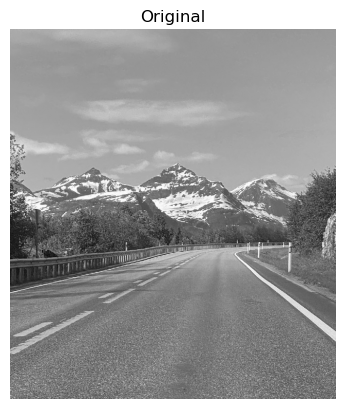

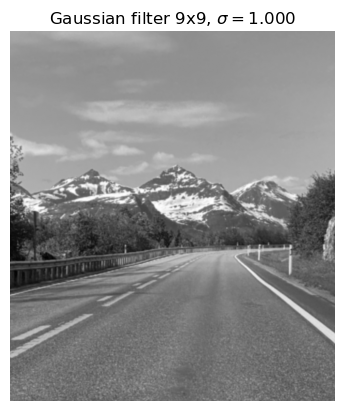

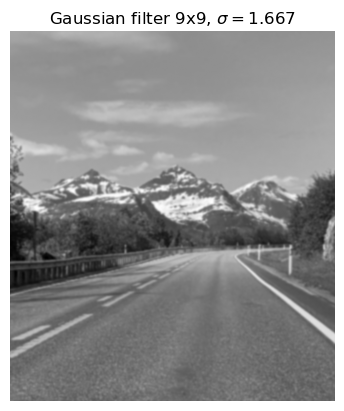

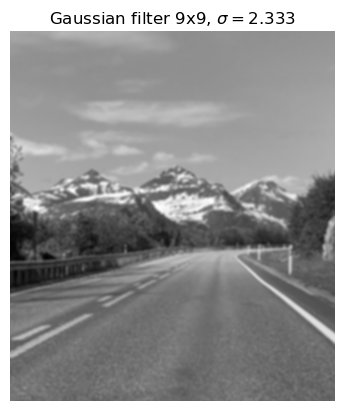

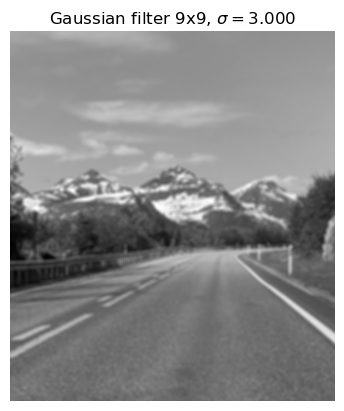

In [31]:
img = cv2.imread("images/norway.jpg", cv2.IMREAD_GRAYSCALE)
sigmas = np.linspace(1.0, 3.0, 4)
filters = [create_gaussian_filter(9, i) for i in np.linspace(1.0, 3.0, 4)]
filtered = [convolution(img, gaussian_filter) for gaussian_filter in filters]
imgs = [img] + filtered
titles = ["Original"] + \
    [f"Gaussian filter 9x9, " + r"$\sigma = $" + f"{sigma:.3f}" for sigma in sigmas]

for img, title in zip(imgs, titles):
    show_image(img, title)

Increasing $\sigma$ makes the image more blurred, since the Gaussian distribution becomes wider thus making the values on the kernel edges contribute more.

#### (d) Edge detection

   - Search edges from the original image and from all filtered images using OpenCV Canny edge detector. Visualize results.
   - Which filter provides the best result? Why? Consider the best result to be one that could be used by the autonomous vehicle to stay in its lane (clear line markings and minimal amount of image noise).

Hint:
 - [OpenCV Canny Edge Detection](https://docs.opencv.org/5.x/da/d22/tutorial_py_canny.html)

In [5]:
# Answer here

## Ex 2.2 Detect and match features (3 p)

#### (a) Detect and visualize SIFT features

 - Read images "images/GOPR1515_03850" and "images/GOPR1515_03852" and convert them to grayscale
 - Run OpenCV SIFT feature detection
 - Visualize found SIFT keypoints from both images

Hints:

 -  We provide you a function visualize_features which can be used to visualize your results.
 - Depending on your OpenCV version, you may need to install OpenCV contrib package: [Link to opencv-contrib-python](https://pypi.org/project/opencv-contrib-python/)
 - OpenCV material that may be useful: 
    - [OpenCV cv::KeyPoint Class Reference](https://docs.opencv.org/5.x/d2/d29/classcv_1_1KeyPoint.html)
    - [OpenCV cv::Feature2D Class Reference](https://docs.opencv.org/5.x/d0/d13/classcv_1_1Feature2D.html)
    - [Introduction to SIFT (Scale-Invariant Feature Transform in OpenCV)](https://docs.opencv.org/5.x/da/df5/tutorial_py_sift_intro.html)

In [14]:
def visualize_features(image, kp):
    """
    Visualize extracted features in the image

    Arguments:
       image: a grayscale image
       kp: list of the extracted keypoints

    Returns:
    """
    display = cv2.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(display)
    

In [19]:
# Answer here

#### (b) Feature matching

 - Implement feature matching algorithm (you can use OpenCV matching algorithm only to verify your results).
 - How good is the result? How could you improve it?

Hint:
   - We provide you a function visualize_matches which can be used to visualize your results.
   - [OpenCV Feature Matching tutorial. Do not use ready made matching algorithm in this exercise!](https://docs.opencv.org/5.x/dc/dc3/tutorial_py_matcher.html)

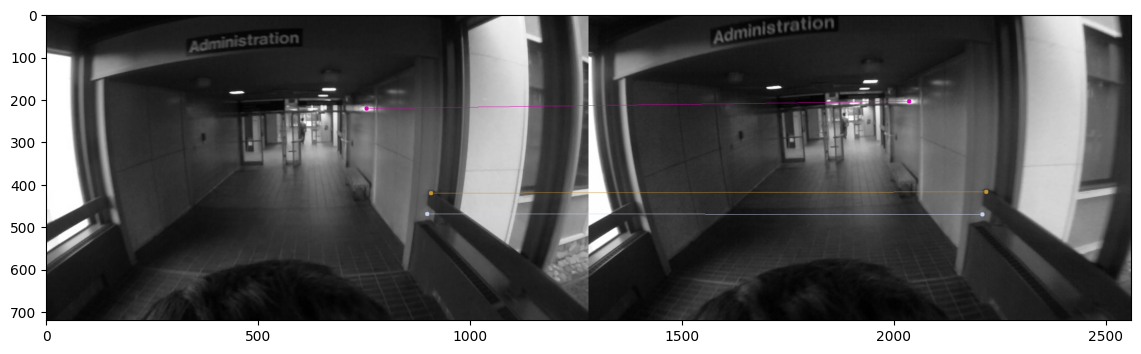

In [18]:
import random

def visualize_matches(image01, kp01, image02, kp02, matches):
    """
    Visualize corresponding matches in two images

    Arguments:
        image1: the first image in a matched image pair
        kp1: list of the keypoints in the first image
        image2: the second image in a matched image pair
        kp2: list of the keypoints in the second image
        matches: list of keypoint index pairs of matched features. Example format: [(0,2), (1,4), (5,10)].

    Returns:
    """
    # Get width of the first image
    _ , width = image01.shape
    
    # Concatenate images
    img = cv2.hconcat([image01, image02])
    
    # Convert image from gray to RGB
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Add matches to image
    for match in matches:
        
        # Get random color
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        color = (r,g,b)
        
        # Get coordinates
        point_img01 = kp01[match[0]].pt
        point_img02 = kp02[match[1]].pt
        
        # Get x and y values from coordinates
        x_img01 = int(point_img01[0])
        y_img01 = int(point_img01[1])
        x_img02 = int(point_img02[0]) + width
        y_img02 = int(point_img02[1]) 
        
        # Draw small circle to matched keypoints
        cv2.circle(img, (x_img01, y_img01), radius=5, color=color, thickness=-1)
        cv2.circle(img, (x_img02, y_img02), radius=5, color=color, thickness=-1)
        
        # Draw line between matches
        cv2.line(img, (x_img01, y_img01), (x_img02, y_img02), color, thickness=1)
    
    # Show image with matches
    plt.figure(figsize=(14, 14), dpi=100)
    plt.imshow(img)
    
# Dummy matches to test visualize_matches function.
# You can try it after you have read images and extracted keypoints in exercise 2.2a.
matches = [(382, 422), (384, 424), (368, 407)]
visualize_matches(img01, keypoints01, img02, keypoints02, matches)

In [7]:
# Answer here

## Ex 2.3: Fourier Transform (2 points)

**Helpful resources:**

- You may utilize either OpenCV or NumPy for FFT and image rotation operations. You can use ready-made functions, don't have to implement FFT from scratch.
- Refer to this link for a detailed OpenCV Fourier Transform tutorial: [OpenCV Fourier Transform Tutorial](https://docs.opencv.org/5.x/de/dbc/tutorial_py_fourier_transform.html)

### Task (a): Evaluating Image Orientation in Signal Space

1. Load the image 'images/son3.png'.
2. Create three copies of the image: one in the original orientation, one rotated by 30 degrees, another by 60 degrees, and the last one by 90 degrees.
3. Perform the Fast Fourier Transform (FFT) followed by an FFT shift on all four images. Then visualize their magnitude spectrums.
4. Observe and describe the orientation of the text in the magnitude images.
5. Explain what causes the appearance of horizontal and vertical lines in the FFT magnitude spectrum. What is the x-axis and y-axis in the frequency domain?

In [8]:
# Answer here

Answer:

4.

5.

### Task (b) High Pass Filter and Low Pass Filter

1. Open the image 'images/lenna.png' and convert it into grayscale.
2. Conduct a Fast Fourier Transform (FFT) on this image.
3. Next, create two copies of the Fourier magnitude spectrum. For one copy, apply a low pass filter (LPF) and for the other, apply a high pass filter (HPF). In both cases, utilize a circular mask with a 30-pixel radius for the filtering process. You can use the function create_circular_mask() below to create the mask for the filters.

In [ ]:
def create_circular_mask(img, radius):
    # Get image size
    h, w = img.shape
    
    # Get center coordinate
    center = (int(w/2), int(h/2))

    # Make open multi-dimensional “meshgrid”
    Y, X = np.ogrid[:h, :w]
    
    # Calculate distance from the image center to every pixel
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    
    # Threshold the result with the user defined radius
    mask = dist_from_center <= radius
 
    # Convert mask from boolean array to integer array
    return mask.astype(int)

In [9]:
# Answer here

4. Below are images of what the magnitude spectrum should look like before and after applying the the filters. Briefly explain what the filters are actually doing to the image. How do you expect it to change the image after the image is converted back from the frequency domain?

![comparison image](images/comparison.png)

Answer:
    
4.

5. Perform an inverse Fourier transform on the spectra that have been filtered.
6. Finally, observe and discuss the impact that the LPF and HPF have had on the image based on the answer you gave in part 4. of the assignment. What would be a possible application for using the High Pass Filter or the Low Pass Filter?

In [ ]:
# Answer here

Answer:

6.